In [1]:
#importing libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.decomposition import PCA
import string
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from imblearn.over_sampling import SMOTE
%load_ext autotime

time: 198 µs (started: 2022-05-09 15:08:01 +05:30)


In [2]:
#Reading the test data
Test_data = pd.read_csv("test_file.csv")
Test_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,10178,60000,2,2,1,30,0,0,0,0,...,38117,38874,38667,39544,1628,1618,1375,1403,1520,1205
1,5304,200000,2,1,2,29,0,0,0,0,...,76593,93988,50292,10510,4160,14593,20150,0,5739,12050
2,5187,230000,1,1,2,39,0,0,0,0,...,20650,0,0,0,2500,2000,0,0,0,0
3,14495,150000,1,1,2,40,0,0,0,0,...,145978,139791,142745,146872,5800,5245,5200,5200,6500,7200
4,20444,140000,1,2,2,27,0,0,0,0,...,76230,77954,78953,81848,10000,10000,3393,3260,5000,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,16413,230000,2,2,1,42,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
8996,17210,90000,2,1,2,28,-1,-1,-1,-1,...,7956,499,0,5990,1950,7956,499,0,5990,0
8997,24002,60000,1,2,2,26,0,0,0,0,...,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120
8998,17019,70000,2,2,2,23,0,0,0,0,...,47208,47241,48212,45849,2100,2079,2500,2000,2000,1700


time: 34.8 ms (started: 2022-05-09 15:08:01 +05:30)


In [3]:
#Reading the train data
Train_data = pd.read_csv("train_file.csv")
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0


time: 62.3 ms (started: 2022-05-09 15:08:01 +05:30)


In [4]:
#Shape of the test Data & train Data
print(" Shape of Test data: ",Test_data.shape)
print(" Shape of Train data: ",Train_data.shape)

 Shape of Test data:  (9000, 24)
 Shape of Train data:  (21000, 25)
time: 2.16 ms (started: 2022-05-09 15:08:02 +05:30)


In [5]:
#Information of the test Data
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         9000 non-null   int64
 1   LIMIT_BAL  9000 non-null   int64
 2   SEX        9000 non-null   int64
 3   EDUCATION  9000 non-null   int64
 4   MARRIAGE   9000 non-null   int64
 5   AGE        9000 non-null   int64
 6   PAY_0      9000 non-null   int64
 7   PAY_2      9000 non-null   int64
 8   PAY_3      9000 non-null   int64
 9   PAY_4      9000 non-null   int64
 10  PAY_5      9000 non-null   int64
 11  PAY_6      9000 non-null   int64
 12  BILL_AMT1  9000 non-null   int64
 13  BILL_AMT2  9000 non-null   int64
 14  BILL_AMT3  9000 non-null   int64
 15  BILL_AMT4  9000 non-null   int64
 16  BILL_AMT5  9000 non-null   int64
 17  BILL_AMT6  9000 non-null   int64
 18  PAY_AMT1   9000 non-null   int64
 19  PAY_AMT2   9000 non-null   int64
 20  PAY_AMT3   9000 non-null   int64
 21  PAY_AMT4   900

In [6]:
#Information of the train Data
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

In [7]:
#Sum of the Test data's Null values
Test_data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

time: 3.45 ms (started: 2022-05-09 15:08:04 +05:30)


In [8]:
#Sum of the Train data's Null values
Train_data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

time: 7.5 ms (started: 2022-05-09 15:08:04 +05:30)


In [9]:
#Sum of the Test data's NaN values
Test_data.isna().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dtype: int64

time: 4.3 ms (started: 2022-05-09 15:08:04 +05:30)


In [10]:
#Sum of the Train data's NaN values
Train_data.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default_payment_next_month    0
dtype: int64

time: 12.1 ms (started: 2022-05-09 15:08:05 +05:30)


In [11]:
#Unique length of the test Data
Test_data.nunique()

ID           9000
LIMIT_BAL      74
SEX             2
EDUCATION       7
MARRIAGE        4
AGE            53
PAY_0          11
PAY_2          10
PAY_3          11
PAY_4          10
PAY_5           9
PAY_6           9
BILL_AMT1    7606
BILL_AMT2    7464
BILL_AMT3    7367
BILL_AMT4    7235
BILL_AMT5    7141
BILL_AMT6    6975
PAY_AMT1     3487
PAY_AMT2     3462
PAY_AMT3     3369
PAY_AMT4     3075
PAY_AMT5     3006
PAY_AMT6     3010
dtype: int64

time: 15.6 ms (started: 2022-05-09 15:08:05 +05:30)


In [12]:
#Unique length of the train Data
Train_data.nunique()

ID                            21000
LIMIT_BAL                        78
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              55
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            10
PAY_5                            10
PAY_6                            10
BILL_AMT1                     16700
BILL_AMT2                     16332
BILL_AMT3                     16142
BILL_AMT4                     15785
BILL_AMT5                     15400
BILL_AMT6                     15102
PAY_AMT1                       6336
PAY_AMT2                       6304
PAY_AMT3                       5964
PAY_AMT4                       5547
PAY_AMT5                       5486
PAY_AMT6                       5519
default_payment_next_month        2
dtype: int64

time: 21.7 ms (started: 2022-05-09 15:08:05 +05:30)


In [13]:
#Checking for duplicates in train data & test data
print(" Duplicates for Train data: ",Train_data.duplicated().sum())
print(" Duplicates for Test data: ",Test_data.duplicated().sum())

 Duplicates for Train data:  0
 Duplicates for Test data:  0
time: 30.9 ms (started: 2022-05-09 15:08:06 +05:30)


In [14]:
#Describing the Train data
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,21000.0,14949.183667,8632.775153,1.0,7508.75,14939.5,22386.75,29998.0
LIMIT_BAL,21000.0,167214.746667,128965.188482,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,21000.0,1.607571,0.488303,1.0,1.00,2.0,2.00,2.0
EDUCATION,21000.0,1.854190,0.791628,0.0,1.00,2.0,2.00,6.0
MARRIAGE,21000.0,1.551714,0.521176,0.0,1.00,2.0,2.00,3.0
AGE,21000.0,35.461619,9.206628,21.0,28.00,34.0,41.00,75.0
PAY_0,21000.0,-0.011190,1.123210,-2.0,-1.00,0.0,0.00,8.0
PAY_2,21000.0,-0.127238,1.198957,-2.0,-1.00,0.0,0.00,8.0
PAY_3,21000.0,-0.164857,1.198624,-2.0,-1.00,0.0,0.00,8.0
PAY_4,21000.0,-0.218190,1.172210,-2.0,-1.00,0.0,0.00,8.0


time: 96.4 ms (started: 2022-05-09 15:08:06 +05:30)


In [15]:
#Unique length of the labels in EDUCATION & MARRIAGE column before merging labels
print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
print(" Train data unique values for MARRIAGE column:: ", Train_data['MARRIAGE'].unique())
print(" Train data unique values for MARRIAGE column: ", Test_data['MARRIAGE'].unique())

 Train data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Test data unique values for EDUCATION column:  [2 1 3 5 4 6 0]
 Train data unique values for MARRIAGE column::  [2 1 3 0]
 Train data unique values for MARRIAGE column:  [1 2 3 0]
time: 4.91 ms (started: 2022-05-09 15:08:06 +05:30)


In [16]:
Train_data[Train_data['PAY_0'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
17,8880,180000,2,2,1,26,-2,-2,-2,-2,...,174825,140909,177257,272817,7017,8201,8246,186732,8000,0
18,1775,120000,2,1,2,28,-2,-2,-2,-2,...,409,872,1539,2054,0,409,872,1539,580,0
38,17529,370000,2,2,2,40,-2,-1,0,0,...,188960,195476,184094,191446,7002,6854,15960,0,122400,0
50,19476,200000,2,2,1,47,-2,-2,-2,-2,...,0,2244,66000,0,5738,1626,2244,66000,30000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20961,16156,300000,2,2,1,43,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,520,1
20975,18961,200000,2,1,2,29,-2,-2,-2,-2,...,-792,-792,69708,0,792,0,0,70500,1688,1
20976,28140,520000,2,1,1,37,-2,-2,-2,-2,...,2310,12000,0,3913,7494,2310,12000,0,0,0
20977,21759,80000,2,1,2,24,-2,-2,-2,-2,...,967,5762,0,698,4949,967,5775,0,0,0


time: 20.7 ms (started: 2022-05-09 15:08:07 +05:30)


In [17]:
Train_data[Train_data['PAY_2'] == -2]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
5,28050,150000,2,1,2,29,-2,-2,-2,-2,...,987,0,14001,5067,131,987,400,14001,0,1
17,8880,180000,2,2,1,26,-2,-2,-2,-2,...,174825,140909,177257,272817,7017,8201,8246,186732,8000,0
18,1775,120000,2,1,2,28,-2,-2,-2,-2,...,409,872,1539,2054,0,409,872,1539,580,0
44,22999,150000,2,4,3,49,1,-2,-1,-1,...,10410,2361,2868,4,7920,10426,0,2868,4384,0
47,18807,170000,2,3,2,31,1,-2,-2,-2,...,0,150,167,0,0,0,150,167,2578,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20976,28140,520000,2,1,1,37,-2,-2,-2,-2,...,2310,12000,0,3913,7494,2310,12000,0,0,0
20977,21759,80000,2,1,2,24,-2,-2,-2,-2,...,967,5762,0,698,4949,967,5775,0,0,0
20978,24652,150000,1,1,1,36,-2,-2,-2,-2,...,1213,26636,2547,2424,27498,1213,26636,2704,1800,0
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


time: 17.1 ms (started: 2022-05-09 15:08:08 +05:30)


In [18]:
#MARRIAGE columns having 0 lablels
Train_data[Train_data['MARRIAGE'] == 0]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
439,23030,80000,2,3,0,37,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1068,3057,200000,1,3,0,36,-2,-2,-2,-2,...,41359,9140,0,89187,14178,41359,9140,0,0,0
1476,219,110000,2,3,0,31,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
1624,10209,50000,2,1,0,45,-1,-1,-2,-2,...,0,4881,4634,0,0,0,4881,0,0,0
1766,7941,50000,1,3,0,50,0,0,0,0,...,13256,14437,16985,1500,1500,1400,1400,2800,0,0
2282,20450,120000,1,3,0,26,0,0,-1,-1,...,13781,8636,5698,13160,5272,13832,8661,5715,38852,0
2357,29079,100000,2,3,0,56,1,2,0,0,...,31134,30444,32460,0,1500,2700,0,2400,0,0
2646,9089,50000,1,3,0,50,0,0,0,-1,...,3400,2769,0,2266,0,3400,2769,1700,0,0
3975,12079,30000,2,3,0,46,1,2,2,2,...,21542,24022,25473,0,3000,0,3000,2000,0,0
4204,5346,50000,2,2,0,28,1,2,0,0,...,46677,47668,50764,0,3154,1669,1741,3900,0,0


time: 23.6 ms (started: 2022-05-09 15:08:08 +05:30)


In [19]:
def merging_labels():
    
    """
    input: takes original labels from the data

    output: merges unwanted or similar labels into one label in the data
    
    """
    #Merging unknown and others label of education column into one label from Train data & Test data
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 5, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 6, 4, Train_data['EDUCATION'])
    Train_data['EDUCATION']=np.where(Train_data['EDUCATION'] == 0, 4, Train_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 5, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 6, 4, Test_data['EDUCATION'])
    Test_data['EDUCATION']=np.where(Test_data['EDUCATION'] == 0, 4, Test_data['EDUCATION'])
    
    #Merging divorced and others label of MARRIAGE column into one label from Train data and Test data
    #Train_data['MARRIAGE']=np.where(Train_data['MARRIAGE'] == 0, Train_data['MARRIAGE'] )
    #Test_data['MARRIAGE']=np.where(Test_data['MARRIAGE'] == 0,  Test_data['MARRIAGE'])
    
    
    # After merging, the Unique length of the test Data
    print(" Train data unique values for EDUCATION column: ",Train_data['EDUCATION'].unique())
    print(" Test data unique values for EDUCATION column: ",Test_data['EDUCATION'].unique())
    #print(" Train data unique values for MARRIAGE column: ",Train_data['MARRIAGE'].unique())
    #print(" Test data unique values for MARRIAGE column: ",Test_data['MARRIAGE'].unique())

time: 2.15 ms (started: 2022-05-09 15:08:09 +05:30)


In [20]:
 merging_labels()

 Train data unique values for EDUCATION column:  [2 1 3 4]
 Test data unique values for EDUCATION column:  [2 1 3 4]
time: 9.38 ms (started: 2022-05-09 15:08:09 +05:30)


In [21]:
def Features_Freq():
    
    """
    Gives Frequency Distribution of all the Features in the data
    
    """

    #Histogram for all the columns
    hist_num = Train_data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 
                'BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6' ]]
    #ax = hist_num.hist(figsize=(15,15))
    #f, axes = plt.subplots(6, 3,  sharex=True, sharey=True, figsize=(20, 20), facecolor='white')
    #f.suptitle('Frequency Distribution of Features', x=0.5, y=1.05, ha='center', fontsize='xx-large')
    #plt.suptitle('Frequency Distribution of Features', x=0.5, y=1.05, ha='center', fontsize='xx-large')
    for x in hist_num:

        sns.histplot(x=x, data=hist_num, kde = True, bins = 20)
        plt.suptitle("{}\n  min = {} ; max = {}\n mean={} ; std_dev={}".format(x, Train_data[x].min(),Train_data[x].max(),round(Train_data[x].mean()),round(Train_data[x].std())), x=0.5, y=1.0, ha='center', va = 'center')
        plt.show()

time: 2.29 ms (started: 2022-05-09 15:08:10 +05:30)


### We can observe that there is highest frequencies in Repayment status, Amount of bill statement and Amount of previous payment

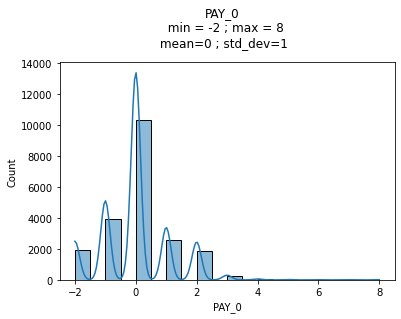

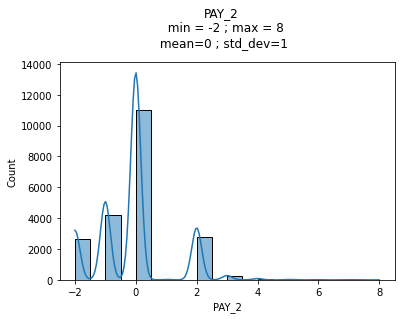

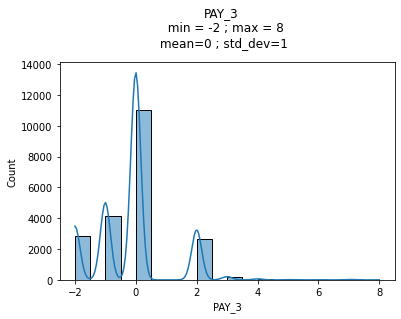

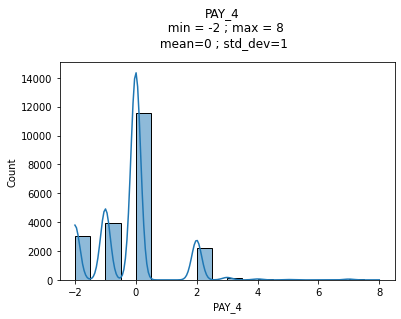

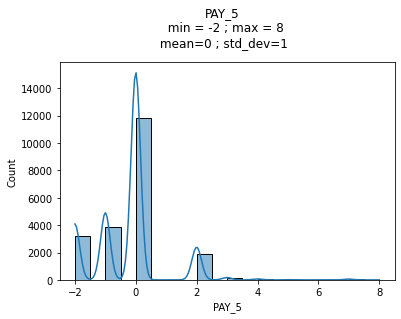

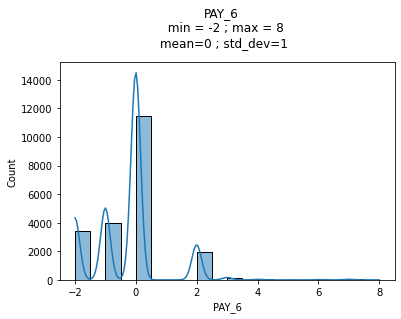

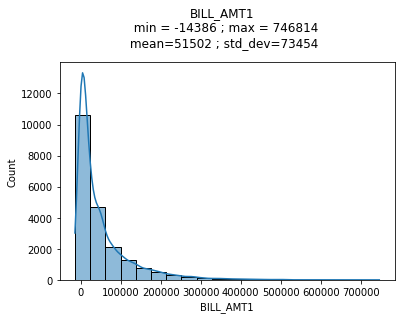

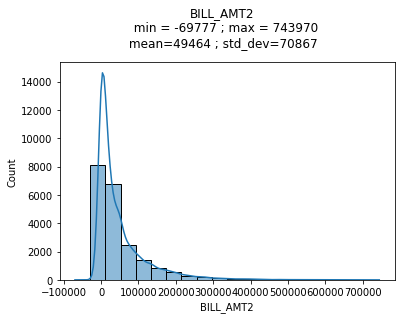

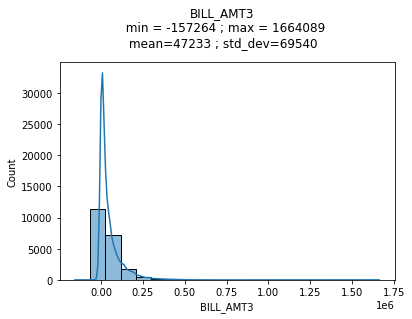

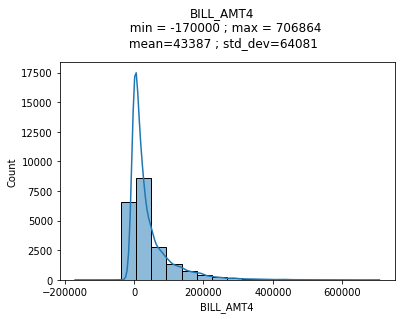

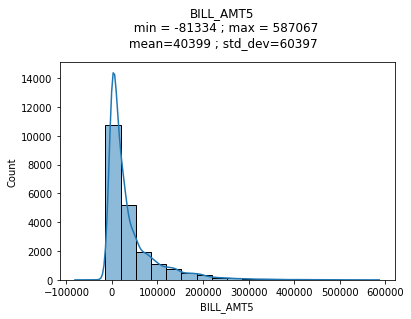

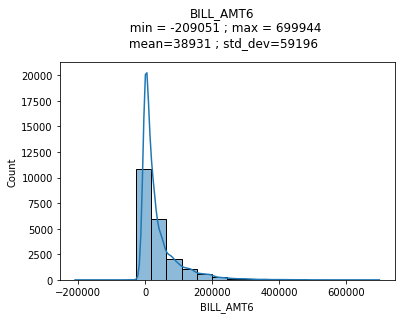

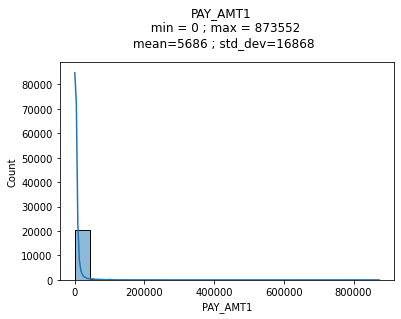

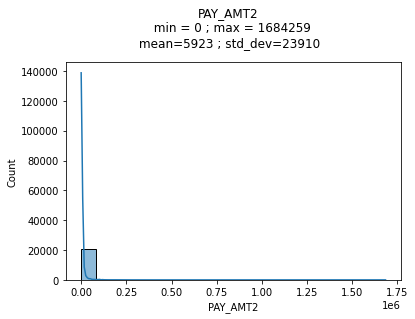

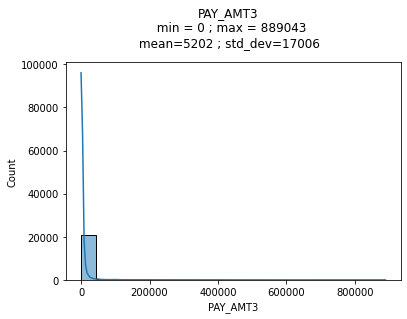

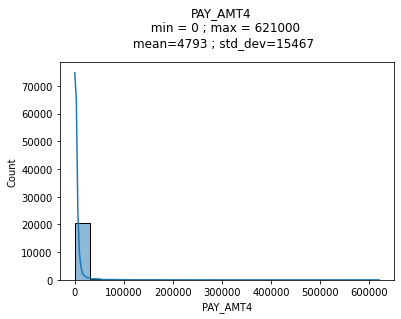

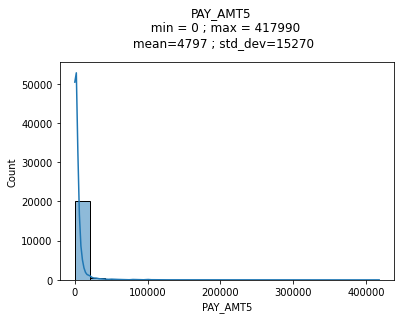

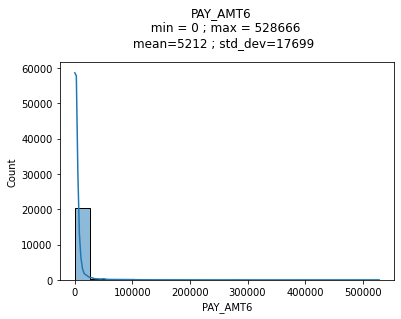

time: 3.91 s (started: 2022-05-09 15:08:11 +05:30)


In [22]:
Features_Freq()

In [23]:
def Categorical_Plot():
    
    """
    returns count plot of categorical variables
    
    """
    
    # Creating a new dataframe with categorical variables
    subset = Train_data[['default_payment_next_month', 'SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6']]
    
    #plt.subplots(3, 3, figsize=(20, 15), facecolor='white')
    #f.suptitle('FREQUENCY OF CATEGORICAL VARIABLES)')
    plt.title('FREQUENCY OF CATEGORICAL VARIABLES',  x=0.5, y=1.65, ha='center', va = 'center',fontsize='xx-large', fontweight = 'bold' )
        
    for x in subset:
        ax = sns.countplot(x=x, data=subset, palette="seismic_r")
        #plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts(normalize = True)))
        plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts()), x=0.5, y=1.20, ha='center', va = 'center')
        #plt.figure(figsize = (10,6))
        # The frequency of defaults
       # compute percentage of each format
    
        total=len(Train_data[x])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12 ,horizontalalignment='center',
        verticalalignment='bottom' )
            #percentage ='{:,.1f}%'.format(p.get_width())
            #width, height =p.get_width(),p.get_height()
            #x=p.get_x()+width+0.02
            #y=p.get_y()+height/2
            #ax.annotate(percentage,(x,y))
 

        plt.show()

time: 1.1 ms (started: 2022-05-09 15:05:10 +05:30)


### We can see that in the default payment column there are 78% credit card users those who are not expected to default payment whereas 22% credit card users  are expected to default the payment.

###  We can see that in the sex column there is higher ratio of females then males

### We can observe that in education column university has the high percentage

###  We can observe that in marraige column singles have the higher percentage 

### We can observe that Repayment status for all months have highest users whose payment is delayed for two months.


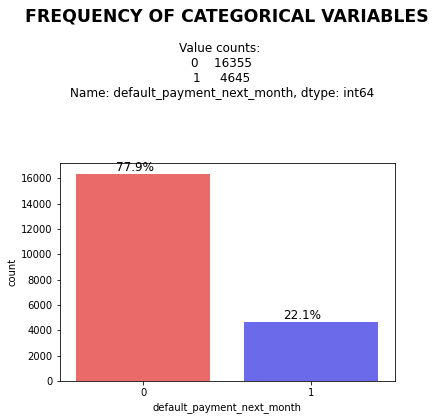

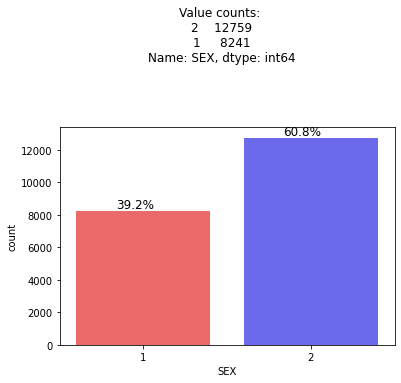

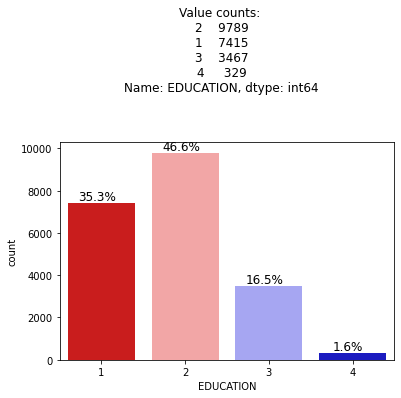

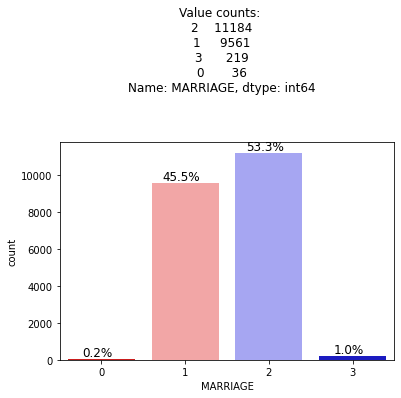

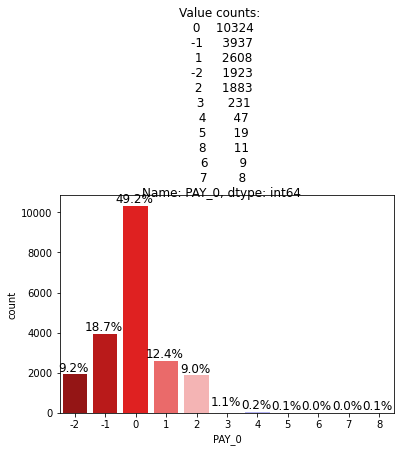

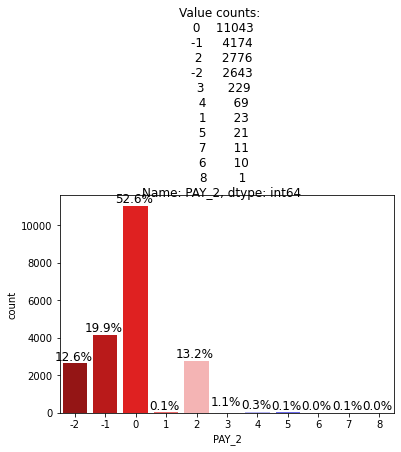

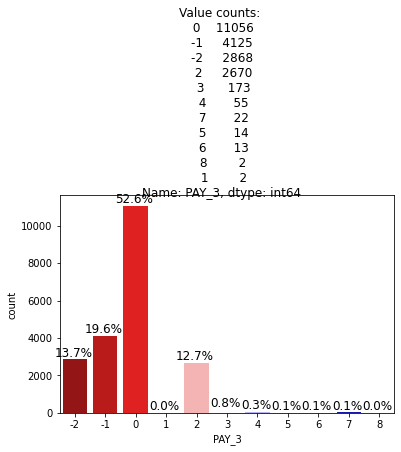

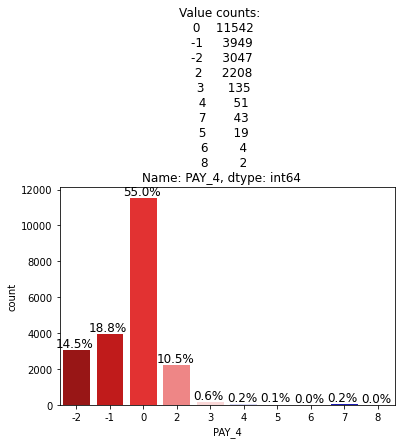

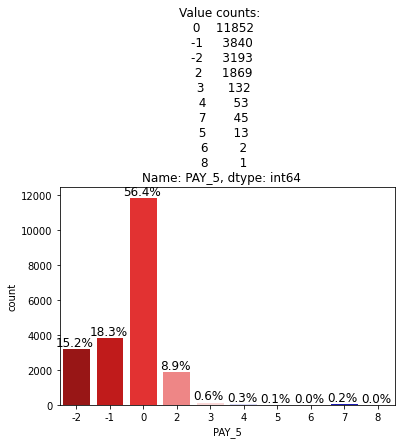

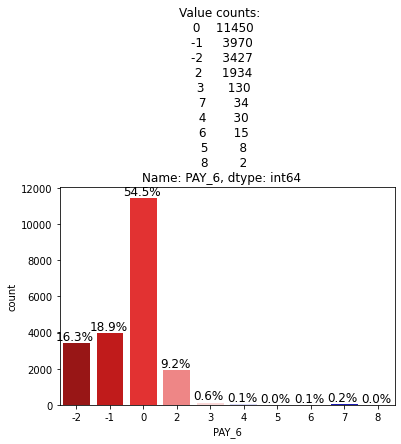

time: 1.66 s (started: 2022-05-09 15:05:10 +05:30)


In [24]:
Categorical_Plot()

In [25]:
def CategoricalHue_Plot():
    
    """
    returns count plot of categorical variables
    
    """
    
    # Creating a new dataframe with categorical variables
    subset = Train_data[['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 
               'PAY_5', 'PAY_6', 'default_payment_next_month']]
    plt.title('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)',  x=0.5, y=1.65, ha='center', va = 'center',fontsize='xx-large', fontweight = 'bold' )
    
    for x1 in subset:

        #plt.title('FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)' , x=0.5, y=1.05, ha='center', fontsize='xx-large')
        ax = sns.countplot(x=x1, hue="default_payment_next_month", data=subset, palette="seismic_r")
        #plt.suptitle('Value counts: \n{}'.format(Train_data[x].value_counts(normalize = True)))
        plt.suptitle('Value counts: \n{}'.format(Train_data[x1].value_counts()), x=0.5, y=1.20, ha='center', va = 'center')
        #plt.figure(figsize = (10,6))
        total=len(Train_data[x1])
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width() / 2 - 0.05
            y = p.get_y() + p.get_height()
            ax.annotate(percentage, (x, y), size = 12 ,horizontalalignment='center',
        verticalalignment='bottom' )
        plt.show()
        #print('Observations: abc \n{}'.subset['sex'])

time: 986 µs (started: 2022-05-09 15:05:12 +05:30)


### By Plotting frequency of categorical variables with reference to default payments, we observe that the there are more number of non-defaulters frequency 

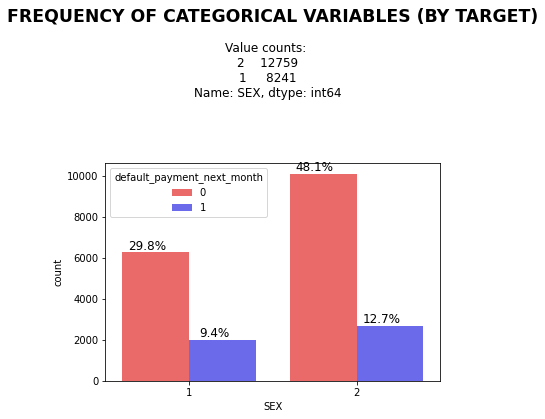

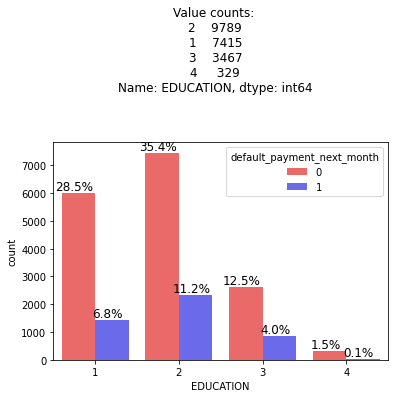

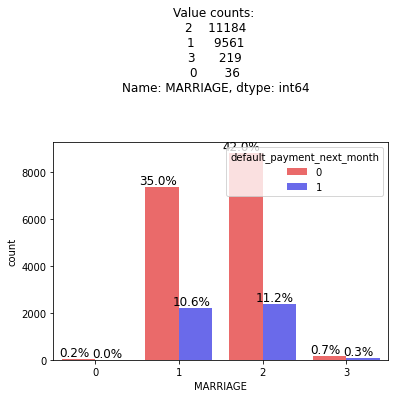

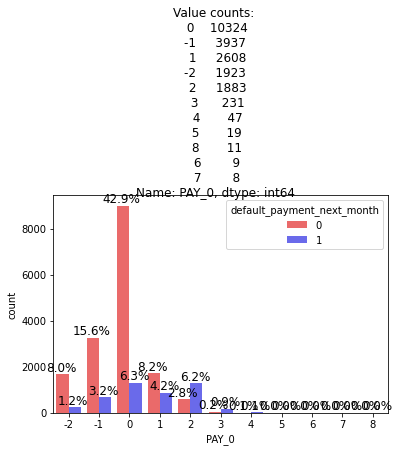

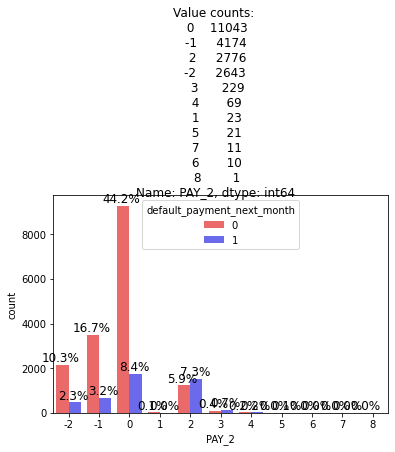

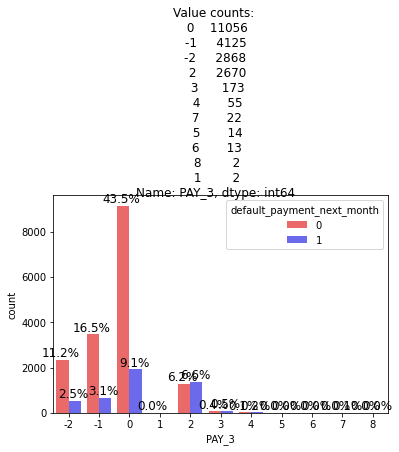

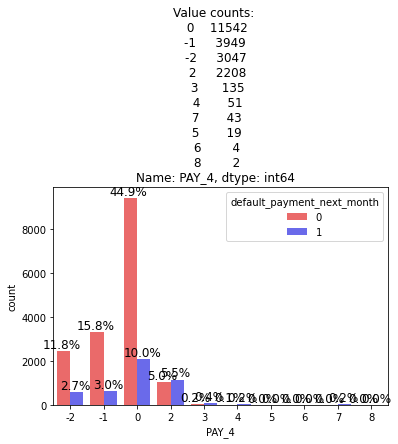

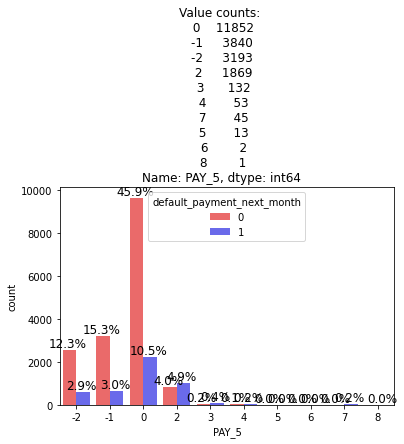

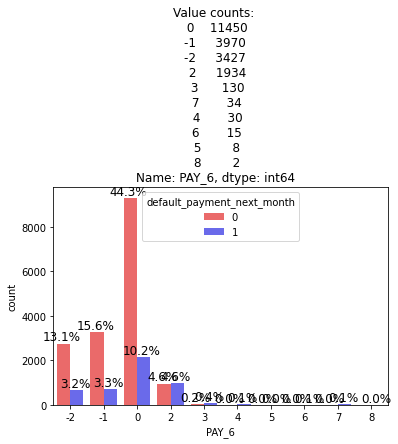

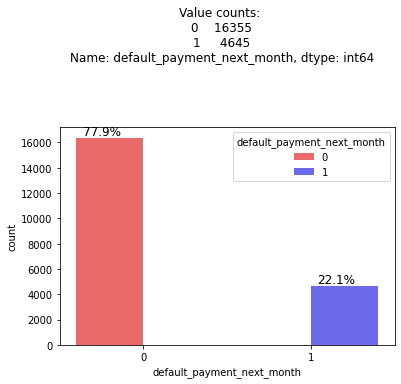

time: 2.12 s (started: 2022-05-09 15:05:12 +05:30)


In [26]:
CategoricalHue_Plot()

### By Plotting histogram of Amount of given credit (NT dollars) with reference to default payments, we observe that the there are more number of non-defaulters frequency for Limit Balance

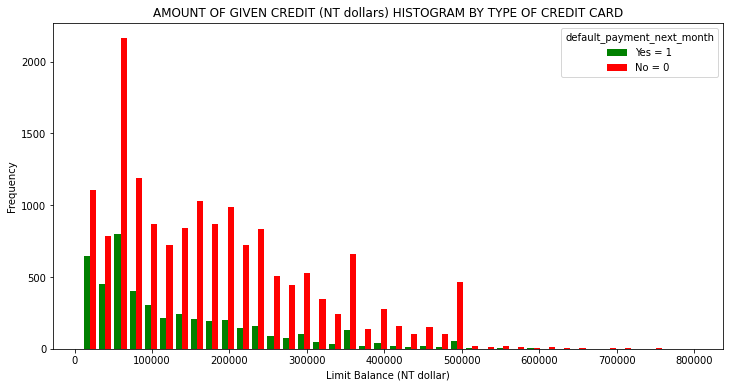

time: 261 ms (started: 2022-05-09 15:05:14 +05:30)


In [27]:
#Defining x1 & y1 for 1 & 0 for Default payment with refrence to Amount of given credit (NT dollars)
x1 = Train_data[Train_data['default_payment_next_month'] == 1]['LIMIT_BAL']
x2 = Train_data[Train_data['default_payment_next_month'] == 0]['LIMIT_BAL']

plt.figure(figsize=(12,6))
plt.hist([x1, x2], bins = 40, color=['Green', 'Red'])
#plt.xlim([0,600000])
plt.legend(['Yes = 1', 'No = 0'], title = 'default_payment_next_month', loc='upper right', facecolor='white')
plt.xlabel('Limit Balance (NT dollar)')
plt.ylabel('Frequency')
plt.title('AMOUNT OF GIVEN CREDIT (NT dollars) HISTOGRAM BY TYPE OF CREDIT CARD')
plt.show()

In [28]:
def Density():
    
    plt.subplots(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(Train_data.LIMIT_BAL, bins = 20, color="brown")

    plt.subplot(122)
    sns.distplot(Train_data.AGE, bins = 20, color="Green")

    plt.show()

time: 641 µs (started: 2022-05-09 15:05:14 +05:30)


###  By plotting the continous variables density plot, we observe that the  dataset consists of skewed data of limiting balance and age of the credit card users.

/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


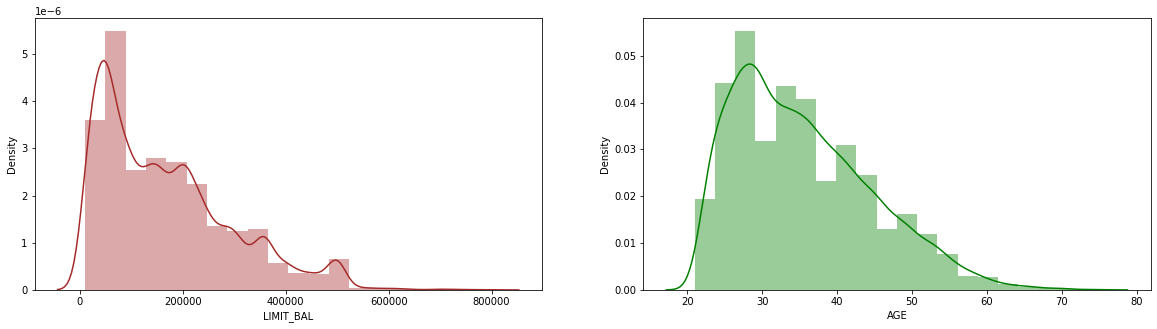

time: 510 ms (started: 2022-05-09 15:05:14 +05:30)


In [29]:
Density()

### We can observe that both positive and negative value decreases simultaneously with refrence to defaulter and non-defaulter, here also the negative value depicts that there are outliers. Repayment status in September has the highest positive value that are defaulters while Repayment status in April has the highest negative value that are non-defaulters  having  more outliers 

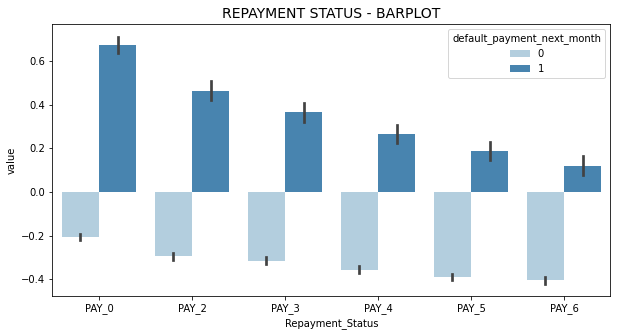

time: 1.55 s (started: 2022-05-09 15:05:15 +05:30)


In [30]:
#Visualizing the repayment status ith reference to default payment
Repayments = Train_data[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'default_payment_next_month']]
Repayment = pd.melt(Repayments,id_vars="default_payment_next_month",
                    var_name="Repayment_Status",
                    value_name='value')

plt.figure(figsize=(10,5))
ax = sns.barplot(y="value", x="Repayment_Status", hue="default_payment_next_month", data=Repayment, palette='Blues')
plt.title('REPAYMENT STATUS - BARPLOT', size=14)
plt.show()

In [31]:
#setting ID as index 
Train_data.set_index('ID',inplace=True)
#Test_data.set_index('ID',inplace=True)

time: 1.04 ms (started: 2022-05-09 15:05:16 +05:30)


### Limit Balance and default payment categories are highly correlated

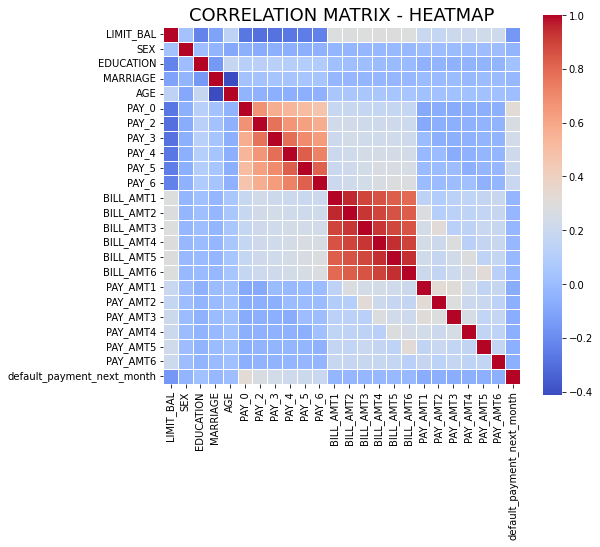

time: 707 ms (started: 2022-05-09 15:05:16 +05:30)


In [32]:
#Correlations matrix
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## Base Model

### Highest Accuracy is observed in KNN Model (78%) and lowest accuracy is observed in Decision Tree Model

In [33]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 23) (21000,)
time: 6.33 ms (started: 2022-05-06 16:26:01 +05:30)


In [34]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16800, 23) (16800,)
(4200, 23) (4200,)
time: 14.5 ms (started: 2022-05-06 16:26:01 +05:30)


### Logistic Regression

In [35]:
#Fitting the Model
lr = LogisticRegression()
l_r = lr.fit(X_train, y_train)

time: 244 ms (started: 2022-05-06 16:26:02 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
#Predicting the test set result
y_pred_test = l_r.predict(X_test)

time: 7.39 ms (started: 2022-05-06 16:26:03 +05:30)


In [37]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3263    1]
 [ 936    0]]
time: 6.55 ms (started: 2022-05-06 16:26:04 +05:30)


In [38]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7769047619047619
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3264
           1       0.00      0.00      0.00       936

    accuracy                           0.78      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.60      0.78      0.68      4200

time: 15.4 ms (started: 2022-05-06 16:26:04 +05:30)


### SVM

In [39]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train,y_train)

SVC(random_state=0)

time: 10.3 s (started: 2022-05-06 16:26:05 +05:30)


In [40]:
#Predicting the test set result
predict=svc.predict(X_test)

time: 1.86 s (started: 2022-05-06 16:26:57 +05:30)


In [41]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3264    0]
 [ 936    0]]
time: 8.21 ms (started: 2022-05-06 16:26:59 +05:30)


In [42]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.7771428571428571
              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3264
           1       0.00      0.00      0.00       936

    accuracy                           0.78      4200
   macro avg       0.39      0.50      0.44      4200
weighted avg       0.60      0.78      0.68      4200

time: 19.4 ms (started: 2022-05-06 16:27:00 +05:30)


/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/rutvathaker/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree

In [43]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 350 ms (started: 2022-05-06 16:27:03 +05:30)


In [44]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 9.88 ms (started: 2022-05-06 16:27:04 +05:30)


In [45]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[2688  576]
 [ 560  376]]
Testing Accuracy score: 0.7295238095238096
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.39      0.40      0.40       936

    accuracy                           0.73      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.73      0.73      0.73      4200

time: 20.5 ms (started: 2022-05-06 16:27:05 +05:30)


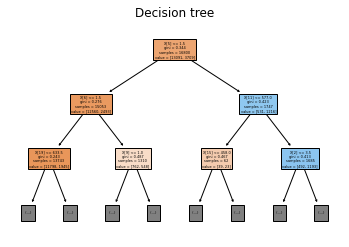

time: 510 ms (started: 2022-05-06 16:27:06 +05:30)


In [46]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### Decision Tree using entropy

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200



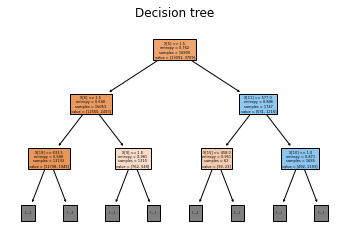

time: 915 ms (started: 2022-05-06 16:27:08 +05:30)


In [47]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

In [48]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 5.22 ms (started: 2022-05-06 16:27:11 +05:30)


In [49]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200

time: 17.6 ms (started: 2022-05-06 16:27:11 +05:30)


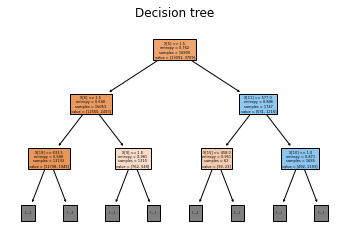

time: 502 ms (started: 2022-05-06 16:27:12 +05:30)


In [50]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### KNN

Minimum error:- 0.2211904761904762 at K = 32


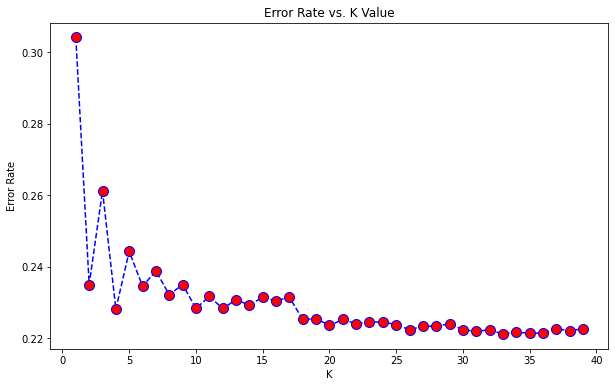

time: 52.3 s (started: 2022-05-06 16:27:14 +05:30)


In [51]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.7788095238095238 at K = 32


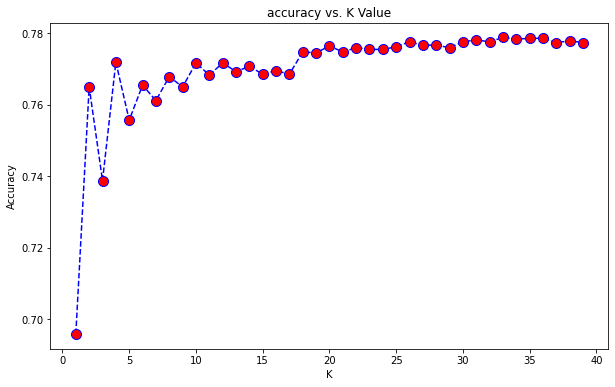

time: 52 s (started: 2022-05-06 16:28:06 +05:30)


In [52]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [53]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=33)  
KNNclassifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=33)

time: 7.92 ms (started: 2022-05-06 16:29:27 +05:30)


In [54]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test)  

time: 1.28 s (started: 2022-05-06 16:29:28 +05:30)


In [55]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[3196   68]
 [ 861   75]]
Testing Accuracy score: 0.7788095238095238
              precision    recall  f1-score   support

           0       0.79      0.98      0.87      3264
           1       0.52      0.08      0.14       936

    accuracy                           0.78      4200
   macro avg       0.66      0.53      0.51      4200
weighted avg       0.73      0.78      0.71      4200

time: 17.8 ms (started: 2022-05-06 16:29:30 +05:30)


In [56]:
def Accuracy_BaseModel_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict)) 
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.15 ms (started: 2022-05-06 16:29:57 +05:30)


In [57]:
Accuracy_BaseModel_score()

Testing Accuracy score of Logistic Regression Model : 0.7769047619047619
Testing Accuracy score of SVM Model : 0.7771428571428571
Testing Accuracy score of Decision Tree Model: 0.7295238095238096
Testing Accuracy score of Decision Tree Model using Entropy : 0.7304761904761905
Testing Accuracy score of KNN Model : 0.7788095238095238
time: 7.36 ms (started: 2022-05-06 16:29:58 +05:30)


## Base Model after Standarizing

### Highest Accuracy is observed in SVM  Model (82%) and lowest accuracy is observed in Decision Tree Model

In [58]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 23) (21000,)
time: 6.25 ms (started: 2022-05-06 16:31:42 +05:30)


In [59]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(16800, 23) (16800,)
(4200, 23) (4200,)
time: 11.9 ms (started: 2022-05-06 16:31:42 +05:30)


In [60]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(4200, 23) (16800, 23)
time: 20 ms (started: 2022-05-06 16:31:43 +05:30)


### Logistic Regression

In [61]:
#Fitting the Model
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200, random_state=42, solver='saga', tol=0.01)

time: 86.6 ms (started: 2022-05-06 16:31:44 +05:30)


In [62]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 1.36 ms (started: 2022-05-06 16:31:44 +05:30)


In [63]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3180   84]
 [ 713  223]]
time: 5.22 ms (started: 2022-05-06 16:31:45 +05:30)


In [64]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.8102380952380952
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      3264
           1       0.73      0.24      0.36       936

    accuracy                           0.81      4200
   macro avg       0.77      0.61      0.62      4200
weighted avg       0.80      0.81      0.77      4200

time: 17.4 ms (started: 2022-05-06 16:31:45 +05:30)


### SVM

In [65]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 9.94 s (started: 2022-05-06 16:31:47 +05:30)


In [66]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.67 s (started: 2022-05-06 16:31:57 +05:30)


In [67]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[3118  146]
 [ 611  325]]
time: 5 ms (started: 2022-05-06 16:32:00 +05:30)


In [68]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8197619047619048
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3264
           1       0.69      0.35      0.46       936

    accuracy                           0.82      4200
   macro avg       0.76      0.65      0.68      4200
weighted avg       0.80      0.82      0.80      4200

time: 15.6 ms (started: 2022-05-06 16:32:01 +05:30)


### Decision Tree

In [69]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 353 ms (started: 2022-05-06 16:32:03 +05:30)


In [70]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 10.4 ms (started: 2022-05-06 16:32:04 +05:30)


In [71]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[2688  576]
 [ 560  376]]
Testing Accuracy score: 0.7295238095238096
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.39      0.40      0.40       936

    accuracy                           0.73      4200
   macro avg       0.61      0.61      0.61      4200
weighted avg       0.73      0.73      0.73      4200

time: 16.9 ms (started: 2022-05-06 16:32:04 +05:30)


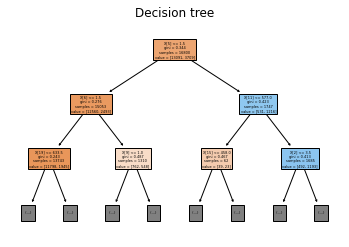

time: 508 ms (started: 2022-05-06 16:32:06 +05:30)


In [72]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### Decision Tree using entropy 

In [73]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 409 ms (started: 2022-05-06 16:32:07 +05:30)


In [74]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 2.93 ms (started: 2022-05-06 16:32:08 +05:30)


In [75]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[2681  583]
 [ 549  387]]
Testing Accuracy score: 0.7304761904761905
              precision    recall  f1-score   support

           0       0.83      0.82      0.83      3264
           1       0.40      0.41      0.41       936

    accuracy                           0.73      4200
   macro avg       0.61      0.62      0.62      4200
weighted avg       0.73      0.73      0.73      4200

time: 13.1 ms (started: 2022-05-06 16:32:08 +05:30)


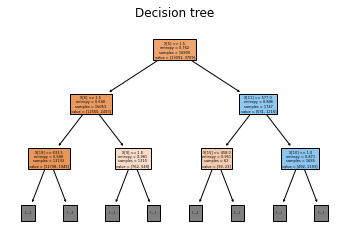

time: 502 ms (started: 2022-05-06 16:32:09 +05:30)


In [76]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

### KNN

Minimum error:- 0.18714285714285714 at K = 37


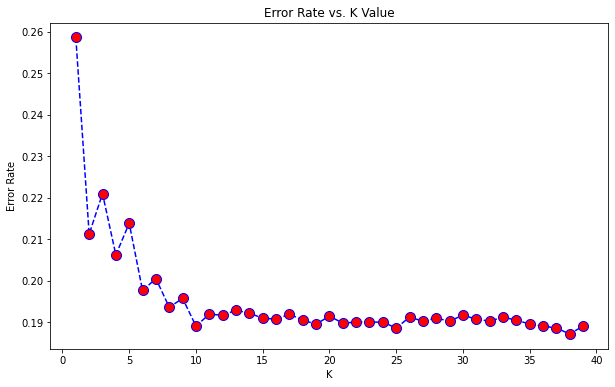

time: 50.8 s (started: 2022-05-06 16:32:11 +05:30)


In [77]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8128571428571428 at K = 37


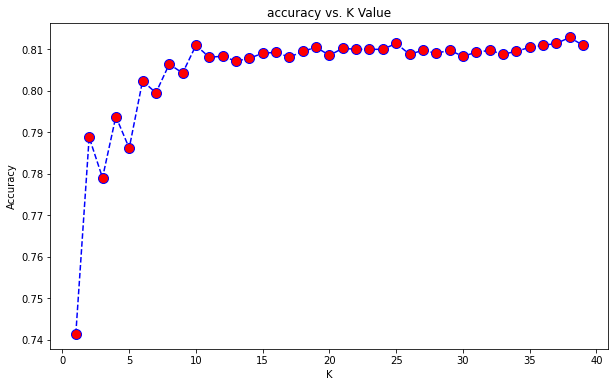

time: 47.9 s (started: 2022-05-06 16:33:04 +05:30)


In [78]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [79]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=37)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier(n_neighbors=37)

time: 5.33 ms (started: 2022-05-06 16:33:58 +05:30)


In [80]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 1.22 s (started: 2022-05-06 16:33:59 +05:30)


In [81]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[3116  148]
 [ 644  292]]
Testing Accuracy score: 0.8114285714285714
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3264
           1       0.66      0.31      0.42       936

    accuracy                           0.81      4200
   macro avg       0.75      0.63      0.66      4200
weighted avg       0.79      0.81      0.78      4200

time: 16.7 ms (started: 2022-05-06 16:34:01 +05:30)


In [82]:
def Accuracy_BaseModel_std_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict)) 
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.71 ms (started: 2022-05-06 16:34:03 +05:30)


In [83]:
Accuracy_BaseModel_std_score()

Testing Accuracy score of Logistic Regression Model : 0.8102380952380952
Testing Accuracy score of SVM Model : 0.8197619047619048
Testing Accuracy score of Decision Tree Model: 0.7295238095238096
Testing Accuracy score of Decision Tree Model using Entropy : 0.7304761904761905
Testing Accuracy score of KNN Model : 0.8114285714285714
time: 7.21 ms (started: 2022-05-06 16:34:13 +05:30)


## After Balancing the Data

## Highest Accuracy is observed in Decision Tree Model(84%) and lowest accuracy is observed in SVM Model using kernel = 'Sigmoid'

In [23]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 24) (21000,)
time: 2.12 ms (started: 2022-05-09 15:08:47 +05:30)


In [24]:
# Balancing the data using SMOTE and cleaning using ENN technique
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(sampling_strategy='not majority', random_state=42)
X, y = sme.fit_resample(X, y)

time: 18.7 s (started: 2022-05-09 15:08:48 +05:30)


In [25]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15376, 24) (15376,)
(3844, 24) (3844,)
time: 9.83 ms (started: 2022-05-09 15:09:11 +05:30)


In [26]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(3844, 24) (15376, 24)
time: 17.8 ms (started: 2022-05-09 15:09:12 +05:30)


## Highest Accuracy is observed in Decision Tree Using Entropy and and SVM Model using kernel = ' sigmoid ' has the lowest accuracy

## Logistic Regression

In [88]:
#Fitting the Model
lr = LogisticRegression(solver='saga', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=200, random_state=42, solver='saga', tol=0.01)

time: 232 ms (started: 2022-05-06 16:35:30 +05:30)


In [89]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 2.82 ms (started: 2022-05-06 16:35:31 +05:30)


In [90]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[ 880  545]
 [ 301 2094]]
time: 3.56 ms (started: 2022-05-06 16:35:31 +05:30)


In [91]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7785340314136125
              precision    recall  f1-score   support

           0       0.75      0.62      0.68      1425
           1       0.79      0.87      0.83      2395

    accuracy                           0.78      3820
   macro avg       0.77      0.75      0.75      3820
weighted avg       0.78      0.78      0.77      3820

time: 16.8 ms (started: 2022-05-06 16:35:32 +05:30)


## SVM

In [92]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 6.74 s (started: 2022-05-06 16:35:36 +05:30)


In [93]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.46 s (started: 2022-05-06 16:35:45 +05:30)


In [94]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1042  383]
 [ 278 2117]]
time: 7.16 ms (started: 2022-05-06 16:35:47 +05:30)


In [95]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8269633507853403
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1425
           1       0.85      0.88      0.86      2395

    accuracy                           0.83      3820
   macro avg       0.82      0.81      0.81      3820
weighted avg       0.83      0.83      0.83      3820

time: 18.7 ms (started: 2022-05-06 16:35:48 +05:30)


## Applying SVM using Kernel = ' Linear '

In [96]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train_std,y_train)

SVC(kernel='linear')

time: 11.6 s (started: 2022-05-06 16:35:57 +05:30)


In [97]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test_std)

time: 778 ms (started: 2022-05-06 16:36:09 +05:30)


In [98]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

[[ 894  531]
 [ 289 2106]]
Testing Accuracy score: 0.7853403141361257
              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1425
           1       0.80      0.88      0.84      2395

    accuracy                           0.79      3820
   macro avg       0.78      0.75      0.76      3820
weighted avg       0.78      0.79      0.78      3820

time: 18.3 ms (started: 2022-05-06 16:36:11 +05:30)


## Applying SVM using Kernel = ' Polynomial '

In [99]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train_std,y_train)

SVC(kernel='poly')

time: 7.07 s (started: 2022-05-06 16:36:14 +05:30)


In [100]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test_std)

time: 885 ms (started: 2022-05-06 16:36:22 +05:30)


In [101]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[ 895  530]
 [ 207 2188]]
Testing Accuracy score: 0.8070680628272251
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      1425
           1       0.81      0.91      0.86      2395

    accuracy                           0.81      3820
   macro avg       0.81      0.77      0.78      3820
weighted avg       0.81      0.81      0.80      3820

time: 20.8 ms (started: 2022-05-06 16:36:23 +05:30)


## Applying SVM using Kernel = ' Gaussian or RBF '

In [102]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train_std,y_train)

SVC()

time: 6.61 s (started: 2022-05-06 16:36:36 +05:30)


In [103]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test_std)

time: 1.44 s (started: 2022-05-06 16:36:44 +05:30)


In [104]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1042  383]
 [ 278 2117]]
Testing Accuracy score: 0.8269633507853403
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1425
           1       0.85      0.88      0.86      2395

    accuracy                           0.83      3820
   macro avg       0.82      0.81      0.81      3820
weighted avg       0.83      0.83      0.83      3820

time: 11.9 ms (started: 2022-05-06 16:36:46 +05:30)


## Applying SVM using Kernel = ' Sigmoid '

In [105]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train_std,y_train)

SVC(kernel='sigmoid')

time: 6.76 s (started: 2022-05-06 16:36:48 +05:30)


In [106]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test_std)

time: 1.14 s (started: 2022-05-06 16:36:55 +05:30)


In [107]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[ 781  644]
 [ 615 1780]]
Testing Accuracy score: 0.6704188481675393
              precision    recall  f1-score   support

           0       0.56      0.55      0.55      1425
           1       0.73      0.74      0.74      2395

    accuracy                           0.67      3820
   macro avg       0.65      0.65      0.65      3820
weighted avg       0.67      0.67      0.67      3820

time: 22.6 ms (started: 2022-05-06 16:36:57 +05:30)


## Decision Tree

In [30]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 311 ms (started: 2022-05-09 15:09:58 +05:30)


In [31]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  

time: 5.03 ms (started: 2022-05-09 15:10:01 +05:30)


In [32]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print(classification_report(y_test,y_DTpredict))

[[ 993  377]
 [ 334 2140]]
Testing Accuracy score: 0.8150364203954215
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1370
           1       0.85      0.86      0.86      2474

    accuracy                           0.82      3844
   macro avg       0.80      0.79      0.80      3844
weighted avg       0.81      0.82      0.81      3844

time: 18.5 ms (started: 2022-05-09 15:10:02 +05:30)


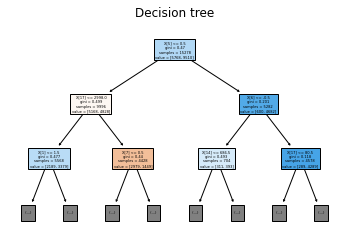

time: 522 ms (started: 2022-05-06 16:37:08 +05:30)


In [111]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

##  Decision Tree using Entropy

In [27]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(class_weight= 'balanced', criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

time: 310 ms (started: 2022-05-09 15:09:22 +05:30)


In [28]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)

time: 7.84 ms (started: 2022-05-09 15:09:31 +05:30)


In [35]:
Labels_Test_data = pd.DataFrame()
Labels_Test_data['ID'] = Test_data['ID']

time: 3.25 ms (started: 2022-05-09 13:51:04 +05:30)


In [36]:
Labels_Test_data['default_payment_next_month'] = y_DTpred
Labels_Test_data.to_csv("Labels_Test_data.csv")

time: 18.8 ms (started: 2022-05-09 13:51:05 +05:30)


In [29]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1023  347]
 [ 307 2167]]
Testing Accuracy score: 0.8298647242455776
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1370
           1       0.86      0.88      0.87      2474

    accuracy                           0.83      3844
   macro avg       0.82      0.81      0.81      3844
weighted avg       0.83      0.83      0.83      3844

time: 18 ms (started: 2022-05-09 15:09:35 +05:30)


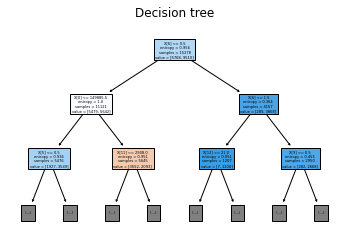

time: 504 ms (started: 2022-05-06 16:37:19 +05:30)


In [115]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.17486910994764399 at K = 0


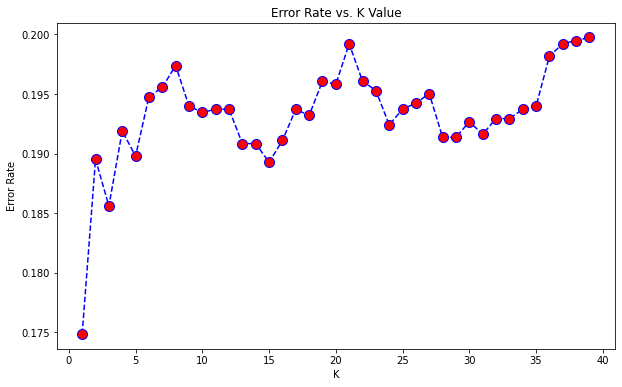

time: 39 s (started: 2022-05-06 16:37:24 +05:30)


In [116]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.8251308900523561 at K = 0


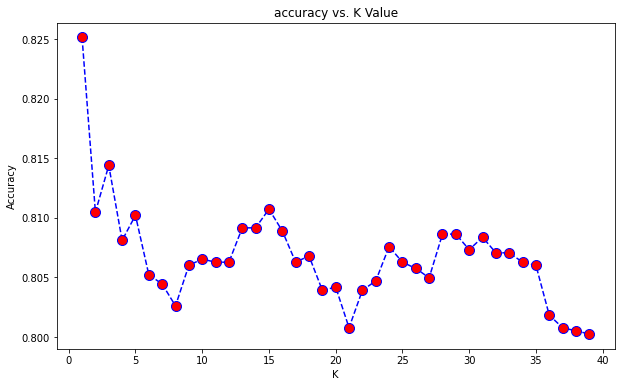

time: 38.9 s (started: 2022-05-06 16:38:12 +05:30)


In [117]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [123]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=3)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier(n_neighbors=3)

time: 30.6 ms (started: 2022-05-09 13:07:35 +05:30)


In [124]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 835 ms (started: 2022-05-09 13:07:36 +05:30)


In [125]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[1036  455]
 [ 228 2020]]
Testing Accuracy score: 0.8173308371222252
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1491
           1       0.82      0.90      0.86      2248

    accuracy                           0.82      3739
   macro avg       0.82      0.80      0.80      3739
weighted avg       0.82      0.82      0.81      3739

time: 18.2 ms (started: 2022-05-09 13:07:37 +05:30)


In [122]:
def Accuracy_Model_score():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 1.38 ms (started: 2022-05-06 16:39:54 +05:30)


In [123]:
Accuracy_Model_score() 

Testing Accuracy score of Logistic Regression Model : 0.7785340314136125
Testing Accuracy score of SVM Model : 0.8269633507853403
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.7853403141361257
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.8070680628272251
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8269633507853403
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.6704188481675393
Testing Accuracy score of Decision Tree Model: 0.8261780104712042
Testing Accuracy score of Decision Tree Model using Entropy : 0.8439790575916231
Testing Accuracy score of KNN Model : 0.8102094240837696
time: 13.3 ms (started: 2022-05-06 16:39:55 +05:30)


### Merging all monthwise columns of Repayment status & Amount of bill statement columns into one column

In [33]:
#Creating single colum of Repayment status(all months) by finding avg of the columns
Train_data['PAY'] = Train_data.loc[:,['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis = 1)
Train_data = Train_data.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY
0,25150,360000,2,2,2,25,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,-1.000000
1,13470,240000,2,1,2,46,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0.000000
2,3092,320000,2,2,1,41,49846,53811,38717,35409,35036,35939,5000,2000,2000,3000,3000,1500,0,0.000000
3,13973,50000,2,2,2,24,2675,0,0,0,0,0,0,0,0,0,0,0,1,-1.666667
4,10567,80000,1,3,1,52,35861,18521,19385,20561,21261,21457,1500,1500,1500,1028,876,1449,0,-0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.500000
20996,25589,80000,2,2,1,37,69767,73197,44195,45458,48679,49895,5000,3000,2000,4000,2000,2000,0,0.000000
20997,4378,100000,1,1,1,52,21509,20877,24122,23440,28843,31353,0,3600,0,6000,3000,0,1,1.166667
20998,8604,90000,2,2,1,47,28477,28718,28847,28747,29177,29452,2000,2000,2000,2000,2000,2000,0,0.000000


time: 21.3 ms (started: 2022-05-09 15:10:10 +05:30)


In [34]:
#Creating single colum of Amount of bill statement(all months) by finding avg of the columns
Train_data['BILL_AMT'] = Train_data.loc[:,['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].mean(axis = 1)
Train_data = Train_data.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6'], axis = 1)
Train_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,PAY,BILL_AMT
0,25150,360000,2,2,2,25,12590,3479,3446,8870,2020,27043,0,-1.000000,8557.666667
1,13470,240000,2,1,2,46,0,0,2240,0,2267,3074,0,0.000000,1107.333333
2,3092,320000,2,2,1,41,5000,2000,2000,3000,3000,1500,0,0.000000,41459.666667
3,13973,50000,2,2,2,24,0,0,0,0,0,0,1,-1.666667,445.833333
4,10567,80000,1,3,1,52,1500,1500,1500,1028,876,1449,0,-0.166667,22841.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,6283,50000,2,2,2,31,0,0,0,0,0,0,0,-1.500000,0.000000
20996,25589,80000,2,2,1,37,5000,3000,2000,4000,2000,2000,0,0.000000,55198.500000
20997,4378,100000,1,1,1,52,0,3600,0,6000,3000,0,1,1.166667,25024.000000
20998,8604,90000,2,2,1,47,2000,2000,2000,2000,2000,2000,0,0.000000,28903.000000


time: 20.2 ms (started: 2022-05-09 15:10:21 +05:30)


In [35]:
#changing the order of columns
cols = Train_data.columns.tolist()
cols = cols[-2:] + cols[:-2]
Train_data = Train_data[cols]

time: 7.12 ms (started: 2022-05-09 15:10:23 +05:30)


### Pay and Default payment are highly corelated

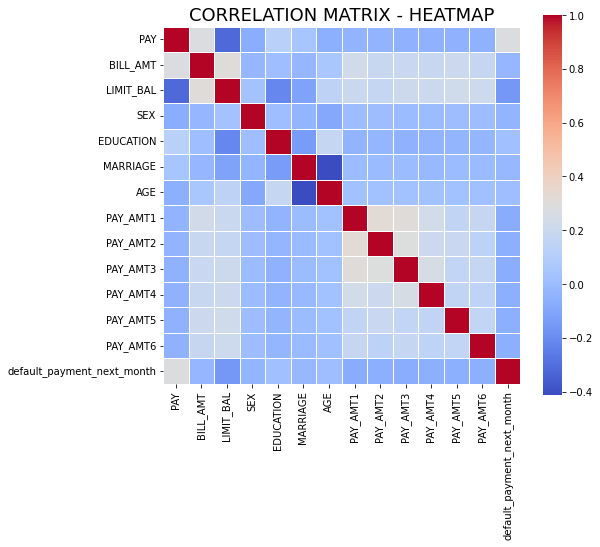

time: 567 ms (started: 2022-05-09 10:45:33 +05:30)


In [8]:
#Correlations matrix after merging columns
corr = Train_data.corr() 
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

## Model after merging columns 

### After merging the columns, no chnages has been observed.

### In this, highest Accuracy is observed in Decision Tree (84%) Using Entropy and and SVM Model using kernel = ' sigmoid ' has the lowest accuracy.

In [36]:
#Defining x & y
X = Train_data.iloc[:, :-1] 
y = Train_data['default_payment_next_month']
print(X.shape, y.shape)

(21000, 14) (21000,)
time: 4.87 ms (started: 2022-05-09 15:10:32 +05:30)


In [37]:
from imblearn.combine import SMOTEENN 
sme = SMOTEENN(sampling_strategy='minority', random_state=42)
X, y = sme.fit_resample(X, y)

time: 2.38 s (started: 2022-05-09 15:10:33 +05:30)


In [38]:
#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15020, 14) (15020,)
(3756, 14) (3756,)
time: 5.15 ms (started: 2022-05-09 15:10:37 +05:30)


In [39]:
#Standarizing the Test Data
X_train_std = StandardScaler().fit_transform(X_train)
X_test_std = StandardScaler().fit_transform(X_test)
print(X_test.shape, X_train.shape)

(3756, 14) (15020, 14)
time: 15.6 ms (started: 2022-05-09 15:10:38 +05:30)


## Logistic Regression

In [132]:
#Fitting the Model
lr = LogisticRegression(C = 1.3348344445560874, solver='saga', penalty = 'l1', tol=1e-2, max_iter=200,random_state=42)
lr.fit(X_train_std, y_train)

LogisticRegression(C=1.3348344445560874, max_iter=200, penalty='l1',
                   random_state=42, solver='saga', tol=0.01)

time: 238 ms (started: 2022-05-06 16:47:26 +05:30)


In [133]:
#Predicting the test set result
y_pred_test = lr.predict(X_test_std)

time: 2.99 ms (started: 2022-05-06 16:47:30 +05:30)


In [134]:
#accessing confusion matrix
c_matrix_test = confusion_matrix(y_test, y_pred_test)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[ 930  567]
 [ 332 1910]]
time: 5.97 ms (started: 2022-05-06 16:47:31 +05:30)


In [135]:
#Accuracy score of the model
#print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

Testing Accuracy score: 0.7595613800481412
              precision    recall  f1-score   support

           0       0.74      0.62      0.67      1497
           1       0.77      0.85      0.81      2242

    accuracy                           0.76      3739
   macro avg       0.75      0.74      0.74      3739
weighted avg       0.76      0.76      0.76      3739

time: 18.7 ms (started: 2022-05-06 16:47:32 +05:30)


## SVM

In [136]:
#Implementing SVM through SVC
svc=SVC(random_state=0)
svc.fit(X_train_std,y_train)

SVC(random_state=0)

time: 5.81 s (started: 2022-05-06 16:47:35 +05:30)


In [137]:
#Predicting the test set result
predict=svc.predict(X_test_std)

time: 1.16 s (started: 2022-05-06 16:47:57 +05:30)


In [138]:
#Creating confusion matrix
c_matrix_test = confusion_matrix(y_test, predict)
print("Testing confusion matrix:", c_matrix_test)

Testing confusion matrix: [[1043  454]
 [ 269 1973]]
time: 6.85 ms (started: 2022-05-06 16:47:59 +05:30)


In [139]:
#Accuracy Score of the model
print("Testing Accuracy score:",accuracy_score(y_test, predict))
print(classification_report(y_test, predict))

Testing Accuracy score: 0.8066327895159133
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1497
           1       0.81      0.88      0.85      2242

    accuracy                           0.81      3739
   macro avg       0.80      0.79      0.79      3739
weighted avg       0.81      0.81      0.80      3739

time: 18.5 ms (started: 2022-05-06 16:47:59 +05:30)


## Applying SVM using Kernel = ' Linear '

In [140]:
#Applying SVM using Kernel='Linear'
svclassifier=SVC(kernel='linear')
svclassifier.fit(X_train_std,y_train)

SVC(kernel='linear')

time: 8.09 s (started: 2022-05-06 16:48:00 +05:30)


In [141]:
#Predicting the test set result
y_predict = svclassifier.predict(X_test_std)

time: 644 ms (started: 2022-05-06 16:48:09 +05:30)


In [142]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_predict))
print("Testing Accuracy score:",accuracy_score(y_test, y_predict))
print(classification_report(y_test,y_predict))

[[ 904  593]
 [ 293 1949]]
Testing Accuracy score: 0.7630382455201926
              precision    recall  f1-score   support

           0       0.76      0.60      0.67      1497
           1       0.77      0.87      0.81      2242

    accuracy                           0.76      3739
   macro avg       0.76      0.74      0.74      3739
weighted avg       0.76      0.76      0.76      3739

time: 12.9 ms (started: 2022-05-06 16:48:10 +05:30)


## Applying SVM using Kernel = ' Polynomial '

In [143]:
#Applying SVM using Kernel='poly'
P_svclassifier=SVC(kernel='poly')
P_svclassifier.fit(X_train_std,y_train)

SVC(kernel='poly')

time: 6.52 s (started: 2022-05-06 16:48:12 +05:30)


In [144]:
#Predicting the test set result
y_prediction = P_svclassifier.predict(X_test_std)

time: 711 ms (started: 2022-05-06 16:48:20 +05:30)


In [145]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_prediction))
print("Testing Accuracy score:",accuracy_score(y_test, y_prediction))
print(classification_report(y_test,y_prediction))

[[ 950  547]
 [ 258 1984]]
Testing Accuracy score: 0.7847017919229741
              precision    recall  f1-score   support

           0       0.79      0.63      0.70      1497
           1       0.78      0.88      0.83      2242

    accuracy                           0.78      3739
   macro avg       0.79      0.76      0.77      3739
weighted avg       0.78      0.78      0.78      3739

time: 18.4 ms (started: 2022-05-06 16:48:22 +05:30)


## Applying SVM using Kernel = ' Gaussian or RBF '

In [146]:
#Applying SVM using Kernel='rbf'
G_svclassifier=SVC(kernel='rbf')
G_svclassifier.fit(X_train_std,y_train)

SVC()

time: 5.46 s (started: 2022-05-06 16:48:24 +05:30)


In [147]:
#Predicting the test set result
ypredict = G_svclassifier.predict(X_test_std)

time: 1.16 s (started: 2022-05-06 16:48:30 +05:30)


In [148]:
#Evaluating the algorithm
print(confusion_matrix(y_test,ypredict))
print("Testing Accuracy score:",accuracy_score(y_test, ypredict))
print(classification_report(y_test,ypredict))

[[1043  454]
 [ 269 1973]]
Testing Accuracy score: 0.8066327895159133
              precision    recall  f1-score   support

           0       0.79      0.70      0.74      1497
           1       0.81      0.88      0.85      2242

    accuracy                           0.81      3739
   macro avg       0.80      0.79      0.79      3739
weighted avg       0.81      0.81      0.80      3739

time: 16 ms (started: 2022-05-06 16:48:32 +05:30)


## Applying SVM using Kernel = ' Sigmoid '

In [149]:
#Applying SVM using Kernel='sigmoid'
S_svclassifier1=SVC(kernel='sigmoid')
S_svclassifier1.fit(X_train_std,y_train)

SVC(kernel='sigmoid')

time: 4.92 s (started: 2022-05-06 16:48:34 +05:30)


In [150]:
#Predicting the test set result
yprediction = S_svclassifier1.predict(X_test_std)

time: 923 ms (started: 2022-05-06 16:48:40 +05:30)


In [151]:
#Evaluating the algorithm
print(confusion_matrix(y_test,yprediction))
print("Testing Accuracy score:",accuracy_score(y_test, yprediction))
print(classification_report(y_test,yprediction))

[[ 885  612]
 [ 513 1729]]
Testing Accuracy score: 0.6991174110724793
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1497
           1       0.74      0.77      0.75      2242

    accuracy                           0.70      3739
   macro avg       0.69      0.68      0.68      3739
weighted avg       0.70      0.70      0.70      3739

time: 21.1 ms (started: 2022-05-06 16:48:41 +05:30)


## Decision Tree

In [48]:
#Fitting Decision Tree classifier to the training set  
classifier= DecisionTreeClassifier(random_state=0)  
classifier.fit(X_train, y_train)  

DecisionTreeClassifier(random_state=0)

time: 194 ms (started: 2022-05-09 15:15:41 +05:30)


In [49]:
#Predicting the test set result  
y_DTpredict= classifier.predict(X_test)  
#y_DTpredict = y_DTpredict[:, 1]
#df = pd.DataFrame(y_DTpredict)
#df
#df.rename(columns = {0:'Non-Defaulters', 1:'Defaulters'}, inplace = True)
#df

time: 6.4 ms (started: 2022-05-09 15:15:42 +05:30)


In [117]:
Test_Label=pd.DataFrame()
Test_Label['ID'] = Test_data['ID']
Test_Label

,ID
0,10178
1,5304
2,5187
3,14495
4,20444
...,...
8995,16413
8996,17210
8997,24002
8998,17019


time: 12.3 ms (started: 2022-05-09 14:57:25 +05:30)


In [51]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=0)
params = {'class_weight':[{0:5, 1:5}]}
gs = GridSearchCV(estimator=clf, param_grid=params, cv=5)
gs.fit(X_train, y_train)
print(gs.best_score_)

0.816711051930759
time: 926 ms (started: 2022-05-09 16:13:10 +05:30)


In [118]:
Test_Label['default_payment_next_month'] = y_DTpredict
Test_Label.to_csv("Test_Label.csv")

time: 23.6 ms (started: 2022-05-09 14:57:25 +05:30)


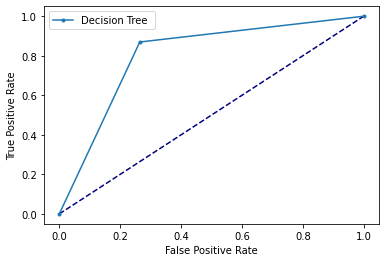

time: 127 ms (started: 2022-05-09 15:04:09 +05:30)


In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
lr_probs = classifier.predict(X_test)
# keeping probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]
#print(lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot([0, 1], [0, 1], color="navy",linestyle="--")
plt.plot(fpr, tpr, marker='.', label='Decision Tree ')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [50]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpredict))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpredict))
print("ROC Score:",roc_auc_score(y_test, y_DTpredict) )
print(classification_report(y_test,y_DTpredict))

[[1067  354]
 [ 308 2027]]
Testing Accuracy score: 0.8237486687965921
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1421
           1       0.85      0.87      0.86      2335

    accuracy                           0.82      3756
   macro avg       0.81      0.81      0.81      3756
weighted avg       0.82      0.82      0.82      3756

time: 18.5 ms (started: 2022-05-09 15:15:46 +05:30)


In [43]:
#Creating DataFrame
report = classification_report(y_test,y_DTpredict, output_dict=True)
df_DT = pd.DataFrame(report).T

time: 12.5 ms (started: 2022-05-09 15:11:12 +05:30)


In [44]:
#Resetting & renaming index
df_DT.reset_index(level=0, inplace=True)
df_DT.rename({'index': 'Decision Tree Classifier'}, axis=1, inplace=True)
df_DT
print("ROC Score:",roc_auc_score(y_test, y_DTpredict) )

,Decision Tree Classifier,precision,recall,f1-score,support
0,0,0.760993,0.755102,0.758036,1421.000000
1,1,0.851662,0.855675,0.853664,2335.000000
2,accuracy,0.817625,0.817625,0.817625,0.817625
3,macro avg,0.806328,0.805388,0.805850,3756.000000
4,weighted avg,0.817360,0.817625,0.817485,3756.000000


time: 13.5 ms (started: 2022-05-09 15:11:13 +05:30)


In [45]:
df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))

NameError: name 'fpr' is not defined

time: 110 ms (started: 2022-05-09 15:11:14 +05:30)


In [46]:
df

NameError: name 'df' is not defined

time: 9.01 ms (started: 2022-05-09 15:11:15 +05:30)


In [47]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_DTpredict)
#acc = accuracy_score(y_test, y_DTpredict)
#prec = precision_score(y_test, y_DTpredict)
#rec = recall_score(y_test, y_DTpredict)
#f1 = f1_score(y_test, y_DTpredict)
print(roc)

model = pd.DataFrame([roc],
               columns = ['ROC'])
model

0.8053882795088056


,ROC
0,0.805388


time: 9.04 ms (started: 2022-05-09 15:11:19 +05:30)


In [118]:
plt.figure()
lw = 2
plt.plot(
    fpr=fpr,
    tpr=tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[2])
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()


KeyError: 2

<Figure size 432x288 with 0 Axes>

time: 14 ms (started: 2022-05-09 13:01:23 +05:30)


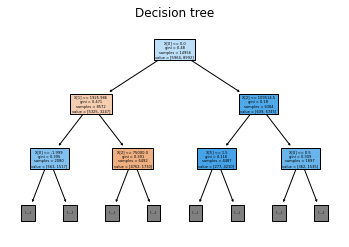

time: 509 ms (started: 2022-05-06 16:48:49 +05:30)


In [155]:
#Plotting Decision Tree
plt.figure()
plot_tree(classifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## Decision Tree Using Entropy

In [55]:
#Fitting Decision Tree classifier using entropy to the training set  
Eclassifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
Eclassifier.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

time: 167 ms (started: 2022-05-09 15:07:02 +05:30)


In [56]:
#Predicting the test set result  
y_DTpred= Eclassifier.predict(X_test)  

time: 2.9 ms (started: 2022-05-09 15:07:03 +05:30)


In [57]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_DTpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_DTpred))
print(classification_report(y_test,y_DTpred))

[[1176  321]
 [ 289 1953]]
Testing Accuracy score: 0.8368547740037443
              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1497
           1       0.86      0.87      0.86      2242

    accuracy                           0.84      3739
   macro avg       0.83      0.83      0.83      3739
weighted avg       0.84      0.84      0.84      3739

time: 20.1 ms (started: 2022-05-09 15:07:04 +05:30)


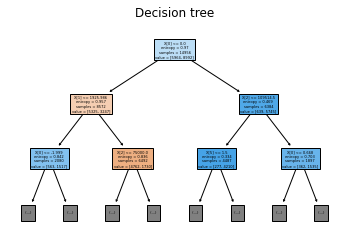

time: 555 ms (started: 2022-05-09 15:07:06 +05:30)


In [58]:
#Plotting Decision Tree using entropy 
plt.figure()
plot_tree(Eclassifier, filled=True, max_depth=2)
plt.title("Decision tree")
plt.show()

## KNN

Minimum error:- 0.182401711687617 at K = 0


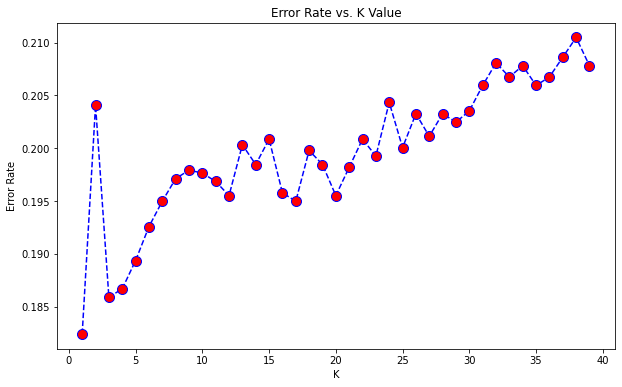

time: 43.6 s (started: 2022-05-06 16:49:09 +05:30)


In [160]:
#Finding Minimum error rate at k-value and plotting the graph
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_std,y_train)
    pred_i = knn.predict(X_test_std)
    error_rate.append(np.mean(pred_i != y_test))
#Plotting the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

Maximum accuracy:- 0.817598288312383 at K = 0


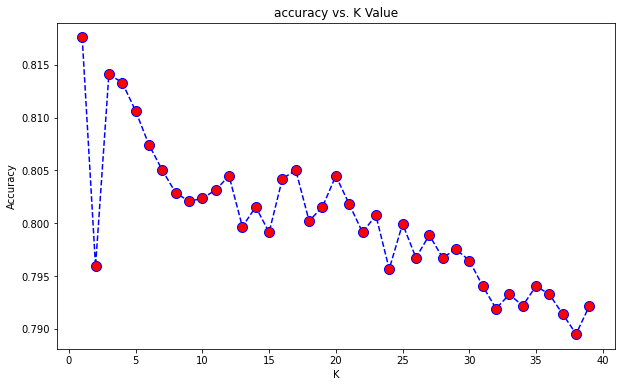

time: 43.6 s (started: 2022-05-06 16:50:00 +05:30)


In [161]:
#Finding highest accuracy rate at k-value and plotting the graph
acc = []
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i,).fit(X_train_std,y_train)
    yhat = neigh.predict(X_test_std)
    acc.append(metrics.accuracy_score(y_test, yhat))
#PLotting the graph    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [58]:
#Fitting K-NN classifier to the training set  
KNNclassifier= KNeighborsClassifier(n_neighbors=1)  
KNNclassifier.fit(X_train_std, y_train)  

KNeighborsClassifier(n_neighbors=1)

time: 35.8 ms (started: 2022-05-09 16:22:23 +05:30)


In [59]:
#Predicting the test set result  
y_KNNpred= KNNclassifier.predict(X_test_std)  

time: 925 ms (started: 2022-05-09 16:22:24 +05:30)


In [60]:
#Evaluating the algorithm
print(confusion_matrix(y_test,y_KNNpred))
print("Testing Accuracy score:",accuracy_score(y_test, y_KNNpred))
print(classification_report(y_test,y_KNNpred))

[[ 996  425]
 [ 255 2080]]
Testing Accuracy score: 0.8189563365282215
              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1421
           1       0.83      0.89      0.86      2335

    accuracy                           0.82      3756
   macro avg       0.81      0.80      0.80      3756
weighted avg       0.82      0.82      0.82      3756

time: 14.2 ms (started: 2022-05-09 16:22:25 +05:30)


In [166]:
def Accuracy_Model_score_Mergedcols():
    
    """
    print all the testing score of all the models
    
    """
    
    print("Testing Accuracy score of Logistic Regression Model :",accuracy_score(y_test, y_pred_test))
    print("Testing Accuracy score of SVM Model :",accuracy_score(y_test, predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Linear':",accuracy_score(y_test, y_predict))
    print("Testing Accuracy score of SVM Model using kernel = 'Polynomial':",accuracy_score(y_test, y_prediction))
    print("Testing Accuracy score of SVM Model using kernel = 'RBF':",accuracy_score(y_test, ypredict))
    print("Testing Accuracy score of SVM Model using kernel = 'Sigmoid':",accuracy_score(y_test, yprediction))  
    print("Testing Accuracy score of Decision Tree Model:",accuracy_score(y_test, y_DTpredict))
    print("Testing Accuracy score of Decision Tree Model using Entropy :",accuracy_score(y_test, y_DTpred))
    print("Testing Accuracy score of KNN Model :",accuracy_score(y_test, y_KNNpred))
    

time: 2.57 ms (started: 2022-05-06 16:50:55 +05:30)


In [167]:
Accuracy_Model_score_Mergedcols()

Testing Accuracy score of Logistic Regression Model : 0.7595613800481412
Testing Accuracy score of SVM Model : 0.8066327895159133
Testing Accuracy score of SVM Model using kernel = 'Linear': 0.7630382455201926
Testing Accuracy score of SVM Model using kernel = 'Polynomial': 0.7847017919229741
Testing Accuracy score of SVM Model using kernel = 'RBF': 0.8066327895159133
Testing Accuracy score of SVM Model using kernel = 'Sigmoid': 0.6991174110724793
Testing Accuracy score of Decision Tree Model: 0.8427387001872159
Testing Accuracy score of Decision Tree Model using Entropy : 0.8368547740037443
Testing Accuracy score of KNN Model : 0.8106445573682803
time: 14 ms (started: 2022-05-06 16:50:57 +05:30)
